# Build a later thickness grid

We set the dimension of the map based on the requested dimension from **Badlands XmL** input file.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading surface file

In [2]:
xyzfile = 'data/deltaHR.csv'
xyz = pd.read_csv(xyzfile, sep=r'\s+', engine='c', header=None, 
                  na_filter=False, dtype=np.float, low_memory=False)

xr = xyz.values[:,0]
yr = xyz.values[:,0]
dx = xr[1]-xr[0]

nx = int((xr[-1]-xr[0])/dx)+1
ny = int((yr[-1]-yr[0])/dx)+1

assert nx*ny==len(xr), 'Values not matching'

xm = xr.reshape((nx,ny),order='F')
ym = yr.reshape((nx,ny))
print nx,ny

481 481


## Creating one thickness, one rock type layer

In [11]:
layth = 250.
rockID = 0

th = np.zeros(len(xr),dtype=float)
rock = np.zeros(len(xr),dtype=int)

th.fill(layth)
rock.fill(rockID)

df = pd.DataFrame({'th':th,'rock':rock})
df.to_csv('data/thlay0.csv',columns=['th','rock'], sep=' ', index=False ,header=0)

## Creating one thickness, multiple rock types layer

In [10]:
layth = 250.

th = np.zeros(len(xr),dtype=float)
th.fill(layth)

rock = np.zeros((nx,ny),dtype=int)

rock[:240,:] = 0
rock[240:,:] = 1
#rock[:,240:] = 3

df = pd.DataFrame({'th':th,'rock':rock.flatten(order='F')})
df.to_csv('data/thlay1.csv',columns=['th','rock'], sep=' ', index=False ,header=0)

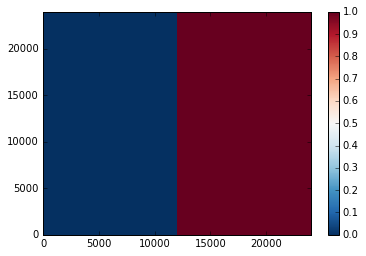

In [9]:
plt.pcolor(xm, ym, rock, cmap='RdBu_r', vmin=rock.min(), vmax=rock.max())
# set the limits of the plot to the limits of the data
plt.axis([xm.min(), xm.max(), ym.min(), ym.max()])
plt.colorbar()

## Creating variable thickness, one rock type layer

In [54]:
th = np.zeros((nx,ny),dtype=float)

tmpth = np.zeros(nx)
tmpx = xm[:,0]
tmpth = 100. * np.sin( 2.* np.pi * (tmpx - 8500) / 22000) + 30.
tmpth[tmpth<30.] = 30.

th = np.array([tmpth,]*ny)

rockID = 0
rock = np.zeros(len(xr),dtype=int)
rock.fill(rockID)

df = pd.DataFrame({'th':th.flatten(order='F'),'rock':rock})
df.to_csv('data/thlay1.csv',columns=['th','rock'], sep=' ', index=False ,header=0)

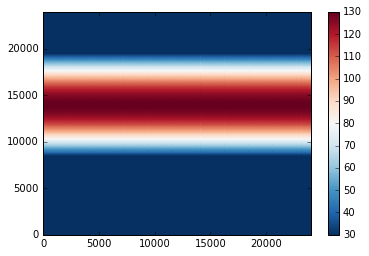

In [56]:
plt.pcolor(xm, ym, th, cmap='RdBu_r', vmin=th.min(), vmax=th.max())
# set the limits of the plot to the limits of the data
plt.axis([xm.min(), xm.max(), ym.min(), ym.max()])
plt.colorbar()